# My data simulator for Pandas tutorial

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(array([  57.,  118.,  189.,  194.,  116.,   71.,   35.,   18.,    0.,    2.]),
 array([    14.89123333,   1081.54174876,   2148.1922642 ,   3214.84277964,
          4281.49329507,   5348.14381051,   6414.79432594,   7481.44484138,
          8548.09535682,   9614.74587225,  10681.39638769]),
 <a list of 10 Patch objects>)

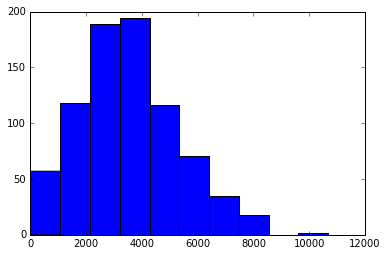

In [16]:
# generate RT distributions from a group of subjects and mess up the data and then store it a csv file
N = 20 # num subjs
n_trials = 800 
lambda_RT = np.random.randint(1,5,N) # lambda for the poisson RT distributions

mean_RT = np.zeros((N,n_trials))

for s in np.arange(N):
    mean_RT[s,:] = (np.random.poisson(lambda_RT[s], n_trials)+np.random.rand(n_trials))*1000
    
    
plt.hist(mean_RT[0,:])



In [31]:
# make index/column labels
# make a list of subject names for use as an index labels
label_prefix = 'Tri'
index=[]
for n in np.arange(n_trials):
    index.append(label_prefix+str(n))
    
    
label_prefix = 'Sub'
columns=[]
for n in np.arange(N):
    columns.append(label_prefix+str(n))
    




In [36]:
# mess up the data a bit...
mean_RT[20:24,4]=np.nan
mean_RT[467,9]=np.nan
mean_RT[754,9]=np.nan
mean_RT[49:56,18]=np.nan
mean_RT[98:101,13]=np.nan
mean_RT[675:670,8]=np.nan
mean_RT[234:245,11]=np.nan
mean_RT[666:669,14]=np.nan
mean_RT[435:450,17]=np.nan

# now some outliers
mean_RT[58,5]=45454
mean_RT[564,7]=29023
mean_RT[764,8]=24567
mean_RT[456,11]=56789
mean_RT[377,12]=34567
mean_RT[799,12]=66666
mean_RT[256,17]=65432

In [37]:
# make the df
df = pd.DataFrame(data=mean_RT, index=index, columns=columns)

df.head()

,Sub0,Sub1,Sub2,Sub3,Sub4,Sub5,Sub6,Sub7,Sub8,Sub9,Sub10,Sub11,Sub12,Sub13,Sub14,Sub15,Sub16,Sub17,Sub18,Sub19
Tri0,2797.224240,1039.571212,4045.345952,3530.934210,2410.276348,6541.494156,1977.919842,2343.555594,143.695964,8147.939691,5183.942423,4548.240971,2076.921296,4230.548795,4134.589984,2067.132295,4087.049471,2704.327437,2790.476384,5141.106292
Tri1,786.895089,3076.223066,1033.310418,3758.043454,4000.805778,2756.802996,2918.768116,2613.934992,2655.684434,7410.337807,3182.903975,4324.103096,1843.506277,1338.453235,2693.772203,7239.094853,1320.715043,4449.372349,1085.884483,3556.231671
Tri2,3516.902396,4632.818016,4874.066155,3031.377402,2485.677228,4929.841314,435.950399,3059.241733,2923.325600,3530.389021,3002.555229,7537.781867,1989.249165,4513.510928,4473.733040,7422.364759,3338.164717,4840.676786,2721.343095,1972.689272
Tri3,333.881830,104.448476,2304.093856,586.098266,4575.178155,2365.682721,1285.101296,5050.566343,2446.870606,5096.855057,1047.603006,5431.187785,2879.554454,311.319060,2814.385809,3396.500194,1324.780081,1518.991979,1676.395223,2051.924695
Tri4,6790.330061,2629.751046,3148.222058,1894.867975,2274.057485,8186.457041,1195.253881,3747.385847,1456.694541,3437.159878,6745.578676,4101.871682,1944.773775,1571.942134,3186.806328,6588.562378,2866.277989,2079.880840,1086.063139,7051.740732


In [38]:
df.to_csv('response_time_data.csv',index=True,header=True)